In [4]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import tqdm

In [5]:
Data = torch.load('dynamicData.pt')

In [6]:
Data.shape

torch.Size([3, 101])

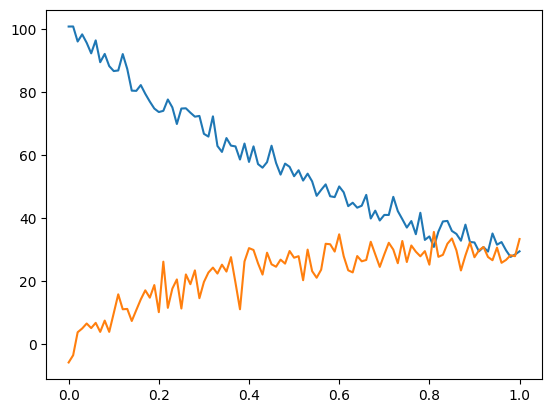

In [7]:
plt.plot(Data[0,:], Data[1,:])
plt.plot(Data[0,:], Data[2,:])



In [8]:
def fwd_solve(y0, theta, dt, nt):

  A = torch.zeros(2,2)
  Ka = 10**theta[0]
  CL = 10**theta[1]
  V  = 10**theta[2]
  A[0,0] = -Ka  
  A[1,0] = Ka/V
  A[1,1] = -CL/V

  # forward Euler
  Y = torch.zeros(2, nt+1)
  T = torch.zeros(nt+1)
  Y[:,0] = y0

  for i in range(nt):
    Y[:,i+1] = Y[:,i] + (A@Y[:,i])*dt
    T[i+1] = T[i] + dt
  return Y, T

In [9]:
y0 = Data[1:,0]
y0[1] = 0
print(y0)
t = Data[0,:]
dt = t[1]-t[0]
nt = 100

theta = 1/2*torch.rand(3)
Y, T = fwd_solve(y0, theta, dt, nt)

tensor([100.8023,   0.0000])


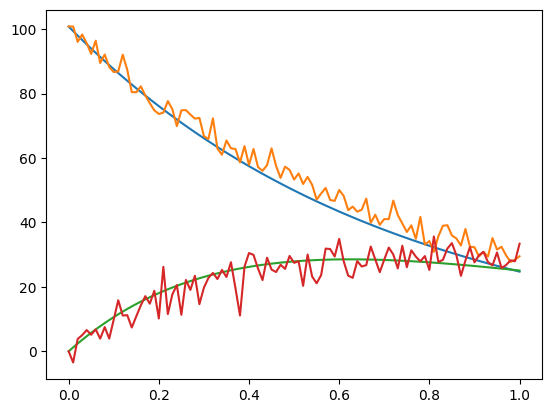

In [10]:
plt.plot(T,Y[0,:], T, Data[1,:])
plt.plot(T,Y[1,:], T, Data[2,:])


In [11]:
class odeSolve(nn.Module):
    
    def __init__(self, nt, dt):
 
        super().__init__()
        
        self.nt = nt
        self.dt = dt
        self.theta = nn.Parameter(1e-1*torch.rand(3))
                    
    def forward(self, y0):
      A = torch.zeros(2,2)
      Ka = 10**self.theta[0]
      CL = 10**self.theta[1]
      V  = 10**self.theta[2]
      A[0,0] = -Ka  
      A[1,0] = Ka/V
      A[1,1] = -CL/V

      # forward Euler
      Y = torch.zeros(2, self.nt+1)
      T = torch.zeros(self.nt+1)
      Y[:,0] = y0

      for i in range(self.nt):
        Y[:,i+1] = Y[:,i] + (A@Y[:,i])*self.dt
        T[i+1] = T[i] + self.dt
      return Y, T

In [12]:
fwdsolve = odeSolve(100, 0.01)

In [17]:
y0 = torch.tensor([100.8023,   0.0000])
Y, T = fwdsolve(y0)

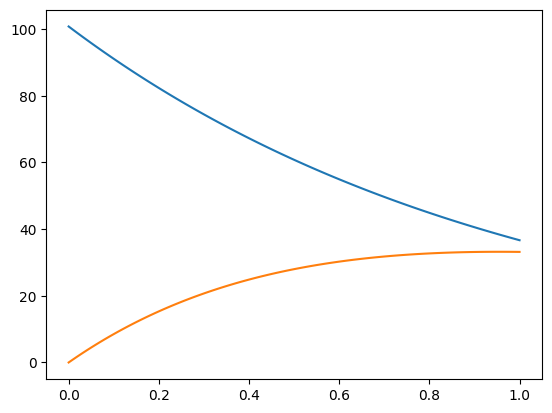

In [22]:
plt.plot(T,Y[0,:].detach(), T,Y[1,:].detach())